Começo do Código

Importação de Bibliotecas

In [100]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.metrics import r2_score

Carregar o Dataset

In [101]:
df = pd.read_excel('data/Dados_2012-2022.xlsx')

## Mesma DataFrame, mas sem os dados de 2020 e 2021

#
df_sem_2020 = df[df['Ano'] != 2020]
#

df_sem_2020e2021 = df_sem_2020[df_sem_2020['Ano'] != 2021]

In [102]:
df.head(5)

,Dia Semana,Dia,Mês,Ano,Data,Nº de Chamadas
0,Domingo,1,1,2012,2012-01-01,4538
1,Segunda-feira,2,1,2012,2012-01-02,3263
2,Terça-feira,3,1,2012,2012-01-03,3126
3,Quarta-feira,4,1,2012,2012-01-04,3199
4,Quinta-feira,5,1,2012,2012-01-05,2999


In [103]:
## Iniciação das variaveis dos meses

janeiro_comCOVID = df[((df['Mês'] == 1))]
fevereiro_comCOVID = df[((df['Mês'] == 2))]
marco_comCOVID = df[((df['Mês'] == 3))]
abril_comCOVID = df[((df['Mês'] == 4))]
maio_comCOVID = df[((df['Mês'] == 5))]
junho_comCOVID = df[((df['Mês'] == 6))]
julho_comCOVID = df[((df['Mês'] == 7))]
agosto_comCOVID = df[((df['Mês'] == 8))]
setembro_comCOVID = df[((df['Mês'] == 9))]
outubro_comCOVID = df[((df['Mês'] == 10))]
novembro_comCOVID = df[((df['Mês'] == 11))]
dezembro_comCOVID = df[((df['Mês'] == 12))]

janeiro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 1))]
fevereiro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 2))]
marco_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 3))]
abril_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 4))]
maio_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 5))]
junho_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 6))]
julho_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 7))]
agosto_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 8))]
setembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 9))]
outubro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 10))]
novembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 11))]
dezembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 12))]

### Número de Chamadas por ano

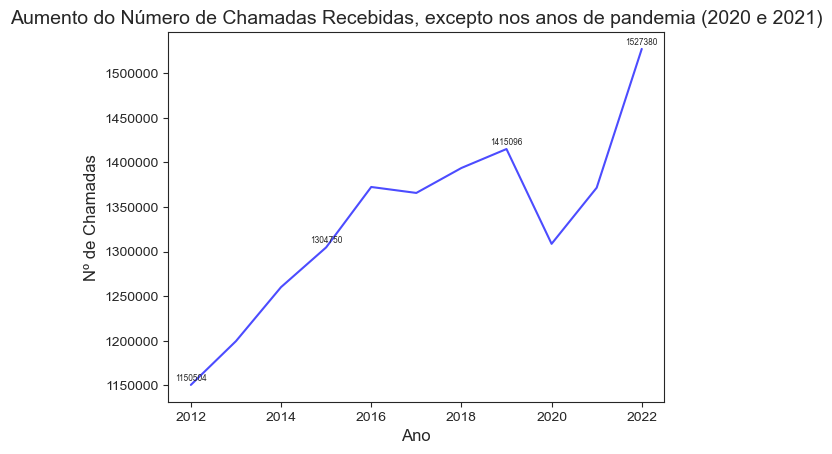

In [104]:
calls_by_year = df.groupby('Ano')['Nº de Chamadas'].sum()
ax = calls_by_year.plot(kind='line', color='blue', alpha=.7)

plt.title('Aumento do Número de Chamadas Recebidas, excepto nos anos de pandemia (2020 e 2021)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

for x, y in zip(calls_by_year.index, calls_by_year.values):
    if(x == 2012 or x == 2015 or x == 2019 or x == 2022):
        label = "{:.0f}".format(y)
        plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,3), ha='center', fontsize=6)

plt.savefig('Img/Aumento de Chamadas Recebidas.png')
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano (Sem 2020 e 2021)

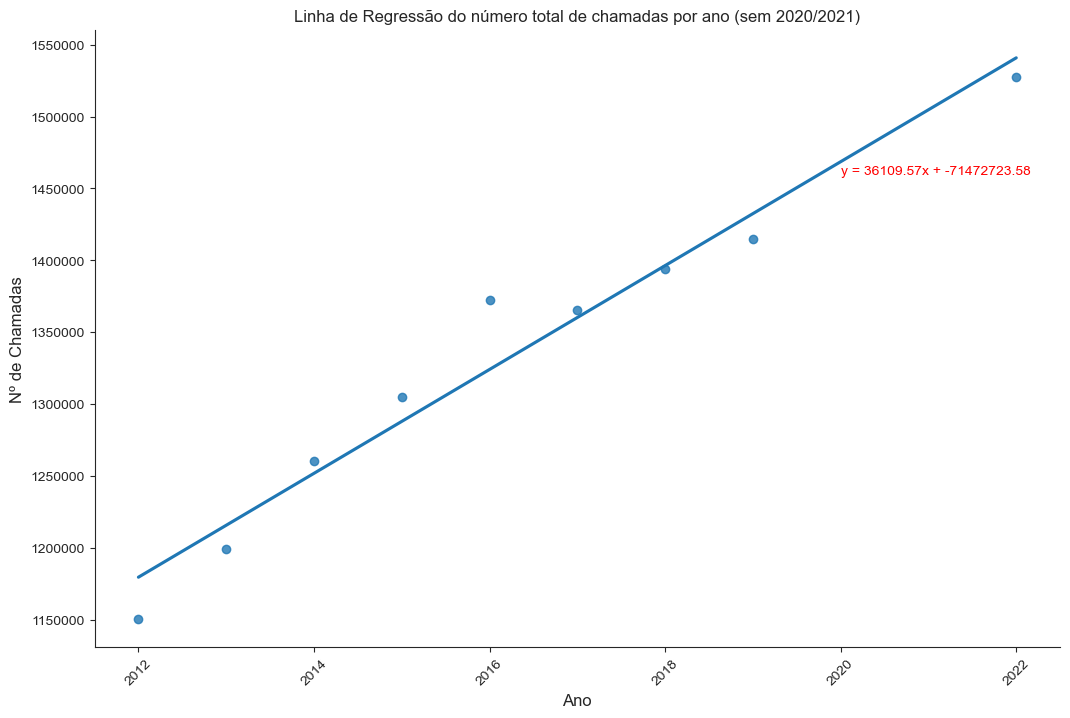

In [105]:
df_grouped = df_sem_2020e2021.groupby('Ano')['Nº de Chamadas'].sum().reset_index()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['Ano'], df_grouped['Nº de Chamadas'])
equacao_reta = f"y = {slope:.2f}x + {intercept:.2f}"

sns.set_style('ticks')
sns.lmplot(x='Ano', y='Nº de Chamadas', data=df_grouped, ci=None, height=7, aspect=1.5)

#Colocar a equação na linha de Regressão
plt.annotate(equacao_reta, xy=(2020, 1460000), fontsize=10, color='red')

plt.title('Linha de Regressão do número total de chamadas por ano (sem 2020/2021)')
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Nº de Chamadas', fontsize = 12)
plt.xticks(rotation=45)

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.savefig('Img/Linha de Regressão do numero total de chamadas por ano (sem 2020_2021).png')
plt.show()


### Linha de Regressão Linear com o numero total de chamadas por ano

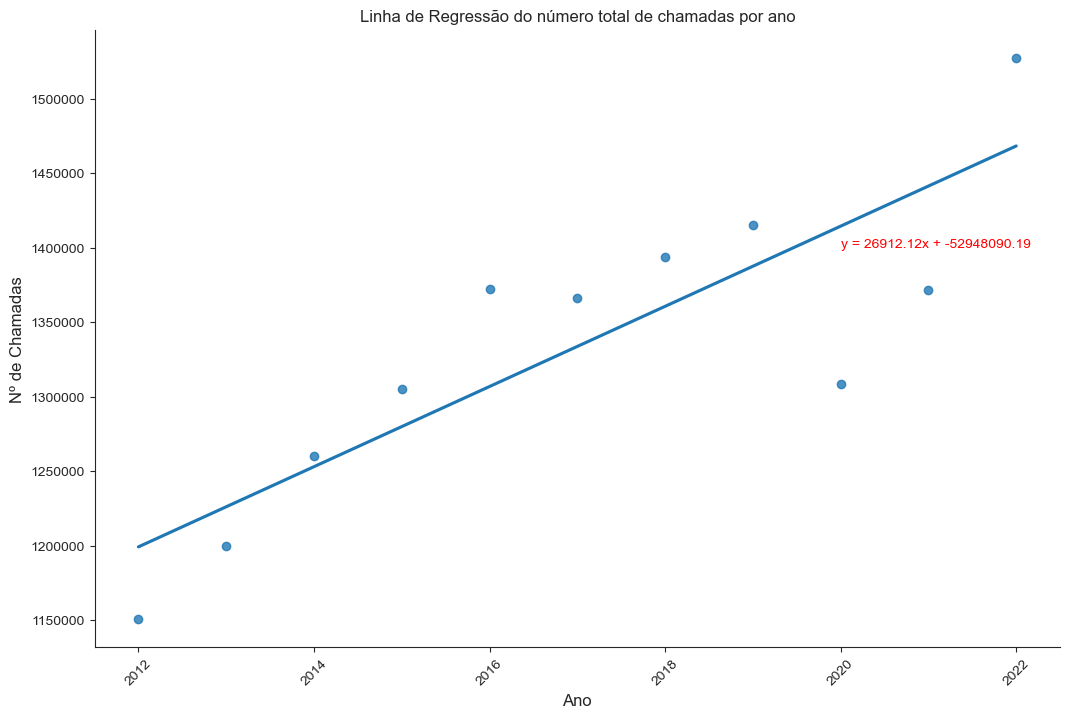

In [106]:
df_grouped = df.groupby('Ano')['Nº de Chamadas'].sum().reset_index()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['Ano'], df_grouped['Nº de Chamadas'])
equacao_reta = f"y = {slope:.2f}x + {intercept:.2f}"

sns.set_style('ticks')
sns.lmplot(x='Ano', y='Nº de Chamadas', data=df_grouped, ci=None, height=7, aspect=1.5)

#Colocar a equação na linha de Regressão
plt.annotate(equacao_reta, xy=(2020, 1400000), fontsize=10, color='red')

plt.title('Linha de Regressão do número total de chamadas por ano')
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Nº de Chamadas', fontsize = 12)
plt.xticks(rotation=45)

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.savefig('Img/Linha de Regressão do numero total de chamadas por ano.png')
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano, por mês (Sem 2020 e 2021)

In [107]:
#Função que dê o numero total de chamadas por ano para todos os meses, com os anos 2020 e 2021
def numeroChaPorAno_Mes_comCOVID(mes):

    lista_Chamadas = []
    lista_Anos = []

    for i in [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]:

        #Acrescenta à lista dos anos o ano i
        lista_Anos.append(i)

        if(mes == 1):
            mesEscolhido = janeiro_comCOVID[janeiro_comCOVID['Ano'] == i]
        elif(mes == 2):
            mesEscolhido = fevereiro_comCOVID[fevereiro_comCOVID['Ano'] == i]
        elif(mes == 3):
            mesEscolhido = marco_comCOVID[marco_comCOVID['Ano'] == i]
        elif(mes == 4):
            mesEscolhido = abril_comCOVID[abril_comCOVID['Ano'] == i]
        elif(mes == 5):
            mesEscolhido = maio_comCOVID[maio_comCOVID['Ano'] == i]
        elif(mes == 6):
            mesEscolhido = junho_comCOVID[junho_comCOVID['Ano'] == i]
        elif(mes == 7):
            mesEscolhido = julho_comCOVID[julho_comCOVID['Ano'] == i]
        elif(mes == 8):
            mesEscolhido = agosto_comCOVID[agosto_comCOVID['Ano'] == i]
        elif(mes == 9):
            mesEscolhido = setembro_comCOVID[setembro_comCOVID['Ano'] == i]
        elif(mes == 10):
            mesEscolhido = outubro_comCOVID[outubro_comCOVID['Ano'] == i]
        elif(mes == 11):
            mesEscolhido = novembro_comCOVID[novembro_comCOVID['Ano'] == i]
        elif(mes == 12):
            mesEscolhido = dezembro_comCOVID[dezembro_comCOVID['Ano'] == i]
        else:
            return "Erro, mês desconhecido"

        nChamadas = mesEscolhido['Nº de Chamadas'].sum()

        #Acrescenta à lista do numero total de chamadas o numero total de chamadas de Janeiro do ano i
        lista_Chamadas.append(nChamadas)

    new_df = pd.DataFrame({'Ano': lista_Anos, 
                        'N Chamadas total': lista_Chamadas})

    return new_df

In [108]:
#Função que dê o numero total de chamadas por ano para todos os meses, tirando os anos 2020 e 2021
def numeroChaPorAno_Mes_semCOVID(mes):

    lista_Chamadas = []
    lista_Anos = []

    for i in [2012,2013,2014,2015,2016,2017,2018,2019,2022]:

        #Acrescenta à lista dos anos o ano i
        lista_Anos.append(i)

        if(mes == 1):
            mesEscolhido = janeiro_semCOVID[janeiro_semCOVID['Ano'] == i]
        elif(mes == 2):
            mesEscolhido = fevereiro_semCOVID[fevereiro_semCOVID['Ano'] == i]
        elif(mes == 3):
            mesEscolhido = marco_semCOVID[marco_semCOVID['Ano'] == i]
        elif(mes == 4):
            mesEscolhido = abril_semCOVID[abril_semCOVID['Ano'] == i]
        elif(mes == 5):
            mesEscolhido = maio_semCOVID[maio_semCOVID['Ano'] == i]
        elif(mes == 6):
            mesEscolhido = junho_semCOVID[junho_semCOVID['Ano'] == i]
        elif(mes == 7):
            mesEscolhido = julho_semCOVID[julho_semCOVID['Ano'] == i]
        elif(mes == 8):
            mesEscolhido = agosto_semCOVID[agosto_semCOVID['Ano'] == i]
        elif(mes == 9):
            mesEscolhido = setembro_semCOVID[setembro_semCOVID['Ano'] == i]
        elif(mes == 10):
            mesEscolhido = outubro_semCOVID[outubro_semCOVID['Ano'] == i]
        elif(mes == 11):
            mesEscolhido = novembro_semCOVID[novembro_semCOVID['Ano'] == i]
        elif(mes == 12):
            mesEscolhido = dezembro_semCOVID[dezembro_semCOVID['Ano'] == i]
        else:
            return "Erro, mês desconhecido"

        nChamadas = mesEscolhido['Nº de Chamadas'].sum()

        #Acrescenta à lista do numero total de chamadas o numero total de chamadas de Janeiro do ano i
        lista_Chamadas.append(nChamadas)

    new_df = pd.DataFrame({'Ano': lista_Anos, 
                        'N Chamadas total': lista_Chamadas})

    return new_df

### Linha de Regressão Polinomial do numero total de chamadas por ano em Janeiro

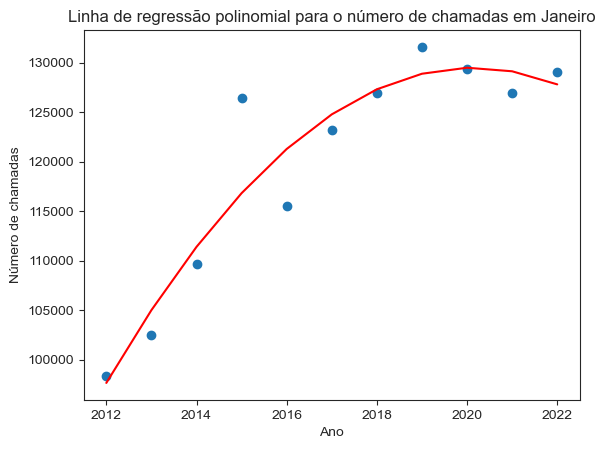

In [109]:
df_jan_comCOVID = numeroChaPorAno_Mes_comCOVID(1)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
y = np.array(df_jan_comCOVID['N Chamadas total'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Linha de regressão polinomial para o número de chamadas em Janeiro')
plt.savefig('Img/Linha de Regressão Polinomial de Janeiro.png')
plt.show()

In [110]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

125507.6363620758


In [111]:
# Calculando r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.8882095785718396


### Linha de Regressão Polinomial do numero total de chamadas por ano em Janeiro (sem 2020/2021)

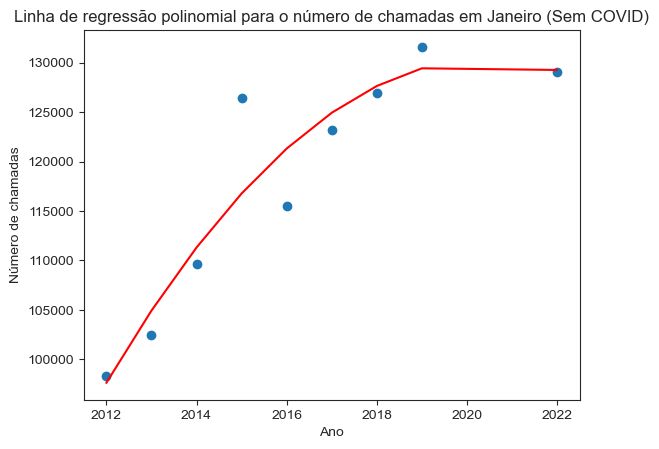

In [112]:
df_jan_semCOVID = numeroChaPorAno_Mes_semCOVID(1)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022])
y = np.array(df_jan_semCOVID['N Chamadas total'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Linha de regressão polinomial para o número de chamadas em Janeiro (Sem COVID)')
plt.savefig('Img/Linha de Regressão Polinomial de Janeiro (Sem COVID).png')
plt.show()

In [113]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

127353.68946790695


In [114]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.8788873448577064


### Linha de Regressão Polinomial do numero total de chamadas por ano em Fevereiro

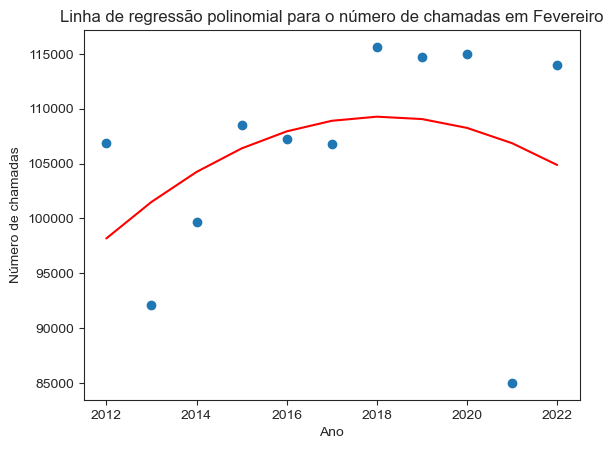

In [115]:
df_fev_comCOVID = numeroChaPorAno_Mes_comCOVID(2)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
y = np.array(df_fev_comCOVID['N Chamadas total'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Linha de regressão polinomial para o número de chamadas em Fevereiro')
plt.savefig('Img/Linha de Regressão Polinomial de Fevereiro.png')
plt.show()

In [116]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

102297.23636245728


In [117]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.1247405545002952


### Linha de Regressão Polinomial do numero total de chamadas por ano em Fevereiro (sem 2020/2021)

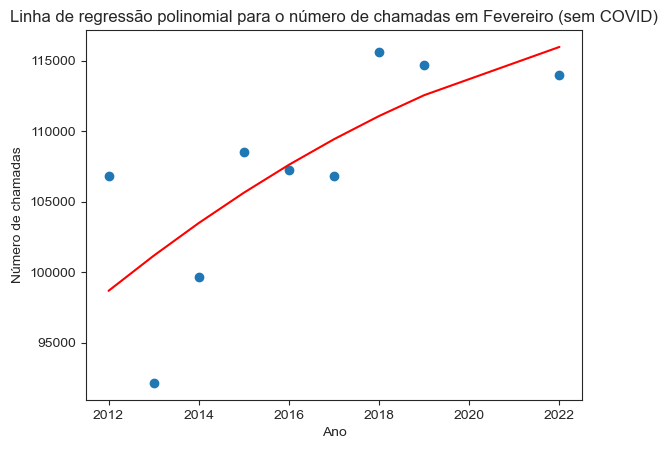

In [118]:
df_fev_semCOVID = numeroChaPorAno_Mes_semCOVID(2)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022])
y = np.array(df_fev_semCOVID['N Chamadas total'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Linha de regressão polinomial para o número de chamadas em Fevereiro (sem COVID)')
plt.savefig('Img/Linha de Regressão Polinomial de Fevereiro (Sem COVID).png')
plt.show()

In [119]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

116767.77413219213


In [120]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.547346104193042


### Linha de Regressão Polinomial do numero total de chamadas por ano em Março

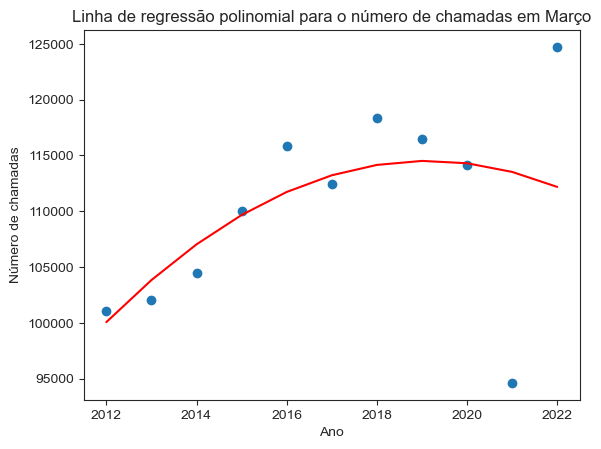

In [121]:
df_mar_comCOVID = numeroChaPorAno_Mes_comCOVID(3)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
y = np.array(df_mar_comCOVID['N Chamadas total'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Linha de regressão polinomial para o número de chamadas em Março')
plt.savefig('Img/Linha de Regressão Polinomial de Março.png')
plt.show()

In [122]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

110268.17575716972


In [123]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.2901491613308814


### Linha de Regressão Polinomial do numero total de chamadas por ano em Março (sem 2020/2021)

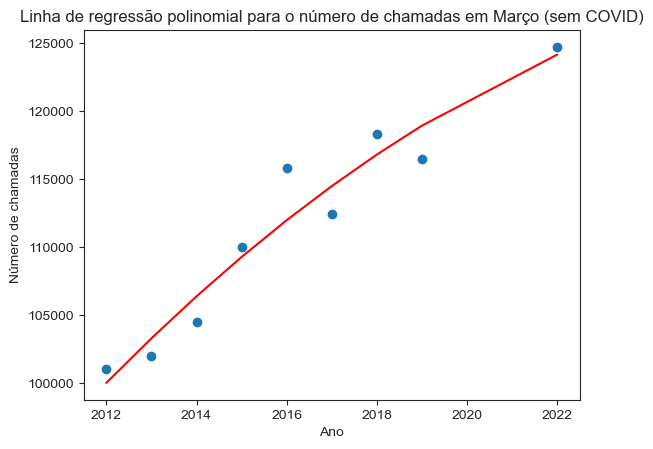

In [124]:
df_mar_semCOVID = numeroChaPorAno_Mes_semCOVID(3)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022])
y = np.array(df_mar_semCOVID['N Chamadas total'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Linha de regressão polinomial para o número de chamadas em Março (sem COVID)')
plt.savefig('Img/Linha de Regressão Polinomial de Março (Sem COVID).png')
plt.show()

In [125]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

125520.44337809086


In [126]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.9339086231193368


### Número total de chamadas recebidas por mês de 2012 a 2022

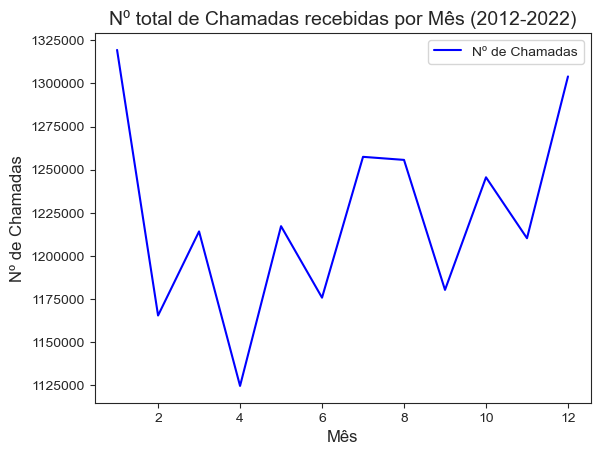

In [127]:
fig, ax = plt.subplots()

calls_by_month = df.groupby('Mês')['Nº de Chamadas'].sum()

ax = calls_by_month.plot(color='blue')

plt.title('Nº total de Chamadas recebidas por Mês (2012-2022)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)
plt.legend()

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas por Mês (2012-2022)')
plt.show()

### Número médio de chamadas recebidas

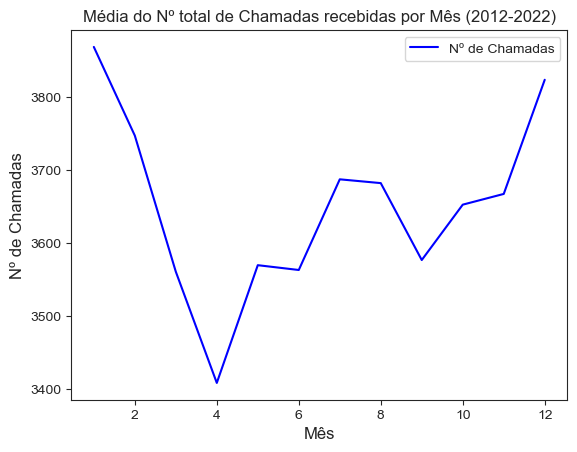

In [128]:
calls_by_month = df.groupby('Mês')['Nº de Chamadas'].mean()

ax = calls_by_month.plot(color='blue')

plt.title('Média do Nº total de Chamadas recebidas por Mês (2012-2022)', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)
plt.legend()

plt.savefig('Img/Média do Nº total de Chamadas recebidas por Mês (2012-2022)')
plt.show()

### Numero de chamadas recebidas por mês, todos os anos

In [129]:
#Função para determinar o numero de chamadas recebidas por dia

def numeroChaPorDia(mes, ano):

    jan = janeiro_comCOVID[janeiro_comCOVID['Ano'] == ano]
    fev = fevereiro_comCOVID[fevereiro_comCOVID['Ano'] == ano]
    mar = marco_comCOVID[marco_comCOVID['Ano'] == ano]
    abr = abril_comCOVID[abril_comCOVID['Ano'] == ano]
    mai = maio_comCOVID[maio_comCOVID['Ano'] == ano]
    jun = junho_comCOVID[junho_comCOVID['Ano'] == ano]
    jul = julho_comCOVID[julho_comCOVID['Ano'] == ano]
    ago = agosto_comCOVID[agosto_comCOVID['Ano'] == ano]
    set = setembro_comCOVID[setembro_comCOVID['Ano'] == ano]
    out = outubro_comCOVID[outubro_comCOVID['Ano'] == ano]
    nov = novembro_comCOVID[novembro_comCOVID['Ano'] == ano]
    dez = dezembro_comCOVID[dezembro_comCOVID['Ano'] == ano]

    if(mes == 1):
        return jan
    elif(mes == 2):
        return fev
    elif(mes == 3):
        return mar
    elif(mes == 4):
        return abr
    elif(mes == 5):
        return mai
    elif(mes == 6):
        return jun
    elif(mes == 7):
        return jul
    elif(mes == 8):
        return ago
    elif(mes == 9):
        return set
    elif(mes == 10):
        return out
    elif(mes == 11):
        return nov
    elif(mes == 12):
        return dez
    else:
        return "Erro, mês não reconhecido"


Numero de chamadas por dia Janeiro

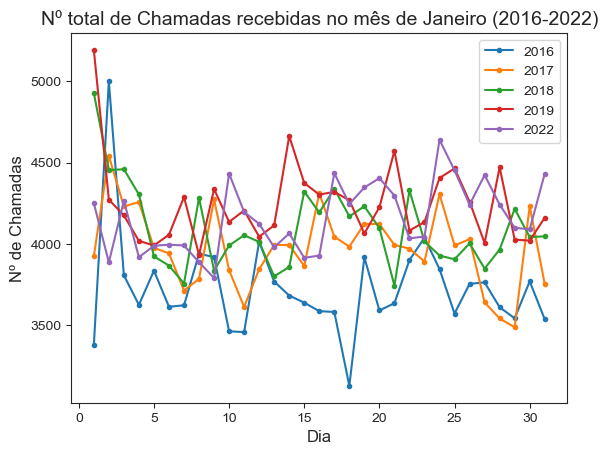

In [130]:
fig, ax = plt.subplots()

jan2016 = numeroChaPorDia(1,2016)
jan2017 = numeroChaPorDia(1,2017)
jan2018 = numeroChaPorDia(1,2018)
jan2019 = numeroChaPorDia(1,2019)
jan2022 = numeroChaPorDia(1,2022)

plt.plot(jan2016['Dia'], jan2016['Nº de Chamadas'], '.-')
plt.plot(jan2017['Dia'], jan2017['Nº de Chamadas'], '.-')
plt.plot(jan2018['Dia'], jan2018['Nº de Chamadas'], '.-')
plt.plot(jan2019['Dia'], jan2019['Nº de Chamadas'], '.-')
plt.plot(jan2022['Dia'], jan2022['Nº de Chamadas'], '.-')

plt.title('Nº total de Chamadas recebidas no mês de Janeiro (2016-2022)', fontsize=14)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)
plt.legend(['2016', '2017', '2018', '2019', '2022'])

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas no mês de Janeiro (2016-2022)')
plt.show()

In [131]:
#Função para determinar o numero de chamadas recebidas por mês

def numeroChaPorMes(ano):

    jan = janeiro_comCOVID[janeiro_comCOVID['Ano'] == ano]
    fev = fevereiro_comCOVID[fevereiro_comCOVID['Ano'] == ano]
    mar = marco_comCOVID[marco_comCOVID['Ano'] == ano]
    abr = abril_comCOVID[abril_comCOVID['Ano'] == ano]
    mai = maio_comCOVID[maio_comCOVID['Ano'] == ano]
    jun = junho_comCOVID[junho_comCOVID['Ano'] == ano]
    jul = julho_comCOVID[julho_comCOVID['Ano'] == ano]
    ago = agosto_comCOVID[agosto_comCOVID['Ano'] == ano]
    set = setembro_comCOVID[setembro_comCOVID['Ano'] == ano]
    out = outubro_comCOVID[outubro_comCOVID['Ano'] == ano]
    nov = novembro_comCOVID[novembro_comCOVID['Ano'] == ano]
    dez = dezembro_comCOVID[dezembro_comCOVID['Ano'] == ano]

    nChamadas_Jan = jan['Nº de Chamadas'].sum()
    nChamadas_Fev = fev['Nº de Chamadas'].sum()
    nChamadas_Mar = mar['Nº de Chamadas'].sum()
    nChamadas_Abr = abr['Nº de Chamadas'].sum()
    nChamadas_Mai = mai['Nº de Chamadas'].sum()
    nChamadas_Jun = jun['Nº de Chamadas'].sum()
    nChamadas_Jul = jul['Nº de Chamadas'].sum()
    nChamadas_Ago = ago['Nº de Chamadas'].sum()
    nChamadas_Set = set['Nº de Chamadas'].sum()
    nChamadas_Out = out['Nº de Chamadas'].sum()
    nChamadas_Nov = nov['Nº de Chamadas'].sum()
    nChamadas_Dez = dez['Nº de Chamadas'].sum()

    lista_Chamadas = [nChamadas_Jan, nChamadas_Fev, nChamadas_Mar, nChamadas_Abr,
          nChamadas_Mai, nChamadas_Jun, nChamadas_Jul, nChamadas_Ago, nChamadas_Set, 
          nChamadas_Out, nChamadas_Nov, nChamadas_Dez]

    lista_Meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

    new_df = pd.DataFrame({'Mês': lista_Meses, 
                        'N Chamadas total': lista_Chamadas})

    return new_df

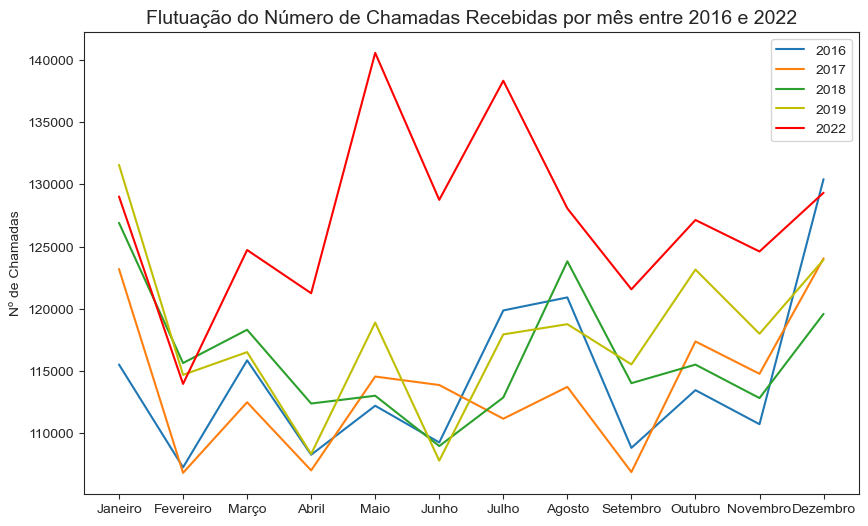

In [132]:
plt.figure(figsize=(10,6))

ano2016 = numeroChaPorMes(2016)
ano2017 = numeroChaPorMes(2017)
ano2018 = numeroChaPorMes(2018)
ano2019 = numeroChaPorMes(2019)
ano2022 = numeroChaPorMes(2022)

#meses = df['Mês'].apply(lambda x: list(calendar.month_name).index(x))

plt.plot(ano2016['Mês'], ano2016['N Chamadas total'], '-')
plt.plot(ano2017['Mês'], ano2017['N Chamadas total'], '-')
plt.plot(ano2018['Mês'], ano2018['N Chamadas total'], '-')
plt.plot(ano2019['Mês'], ano2019['N Chamadas total'], 'y-')
plt.plot(ano2022['Mês'], ano2022['N Chamadas total'], 'r-')

plt.title('Flutuação do Número de Chamadas Recebidas por mês entre 2016 e 2022', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['2016', '2017', '2018', '2019', '2022'])
plt.savefig('Img/Flutuação do Número de Chamadas Recebidas por mês entre 2016 e 2022')
plt.show()

### Começar a ver os dias da semana

In [133]:
segundas = df[(df['Dia Semana'] == 'Segunda-feira')]
tercas = df[(df['Dia Semana'] == 'Terça-feira')]
quartas = df[(df['Dia Semana'] == 'Quarta-feira')]
quintas = df[(df['Dia Semana'] == 'Quinta-feira')]
sextas = df[(df['Dia Semana'] == 'Sexta-feira')]
sabados = df[(df['Dia Semana'] == 'Sábado')]
domingos = df[(df['Dia Semana'] == 'Domingo')]

Função para descobrir o numero de chamadas por dia de semana

In [134]:
#Função para determinar o numero de chamadas recebidas por
#dia da semana (pds) num MÊS!!! 

def numeroChaPDS(mes, ano):

    segEsc = segundas[((segundas['Ano'] == ano) & (segundas['Mês'] == mes))]
    terEsc = tercas[(tercas['Ano'] == ano) & (tercas['Mês'] == mes)]
    quaEsc = quartas[(quartas['Ano'] == ano) & (quartas['Mês'] == mes)]
    quiEsc = quintas[(quintas['Ano'] == ano) & (quintas['Mês'] == mes)]
    sexEsc = sextas[(sextas['Ano'] == ano) & (sextas['Mês'] == mes)]
    sabEsc = sabados[(sabados['Ano'] == ano) & (sabados['Mês'] == mes)]
    domEsc = domingos[(domingos['Ano'] == ano) & (domingos['Mês'] == mes)]

    nChamadas_Seg = segEsc['Nº de Chamadas'].sum()
    nChamadas_Ter = terEsc['Nº de Chamadas'].sum()
    nChamadas_Qua = quaEsc['Nº de Chamadas'].sum()
    nChamadas_Qui = quiEsc['Nº de Chamadas'].sum()
    nChamadas_Sex = sexEsc['Nº de Chamadas'].sum()
    nChamadas_Sab = sabEsc['Nº de Chamadas'].sum()
    nChamadas_Dom = domEsc['Nº de Chamadas'].sum()

    lista_Chamadas = [nChamadas_Seg, nChamadas_Ter, nChamadas_Qua, nChamadas_Qui,
          nChamadas_Sex, nChamadas_Sab, nChamadas_Dom]

    lista_DiaSemana = ['Segunda', 'Terça', 'Quarta',
    'Quinta', 'Sexta', 'Sábado', 'Domingo']

    new_df = pd.DataFrame({'Dia Semana': lista_DiaSemana, 
                        'N Chamadas total': lista_Chamadas})

    return new_df

### Numero total de chamadas no mes de Janeiro de 6 anos

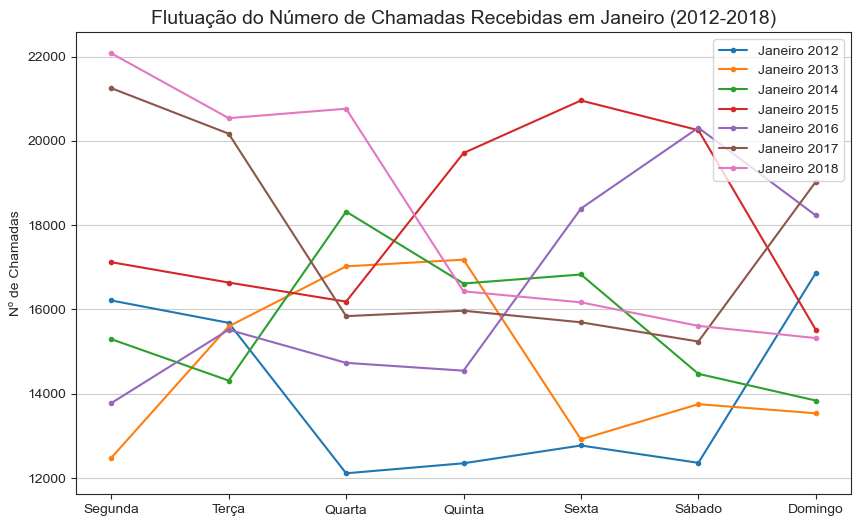

In [135]:
plt.figure(figsize=(10,6))

jan2012 = numeroChaPDS(1, 2012)
jan2013 = numeroChaPDS(1, 2013)
jan2014 = numeroChaPDS(1, 2014)
jan2015 = numeroChaPDS(1, 2015)
jan2016 = numeroChaPDS(1, 2016)
jan2017 = numeroChaPDS(1, 2017)
jan2018 = numeroChaPDS(1, 2018)

plt.plot(jan2012['Dia Semana'], jan2012['N Chamadas total'], '.-')
plt.plot(jan2013['Dia Semana'], jan2013['N Chamadas total'], '.-')
plt.plot(jan2014['Dia Semana'], jan2014['N Chamadas total'], '.-')
plt.plot(jan2015['Dia Semana'], jan2015['N Chamadas total'], '.-')
plt.plot(jan2016['Dia Semana'], jan2016['N Chamadas total'], '.-')
plt.plot(jan2017['Dia Semana'], jan2017['N Chamadas total'], '.-')
plt.plot(jan2018['Dia Semana'], jan2018['N Chamadas total'], '.-')
         
plt.title('Flutuação do Número de Chamadas Recebidas em Janeiro (2012-2018)', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Janeiro 2012', 'Janeiro 2013', 'Janeiro 2014', 'Janeiro 2015', 
            'Janeiro 2016', 'Janeiro 2017', 'Janeiro 2018'])
plt.grid(axis='y')

plt.savefig('Img/Flutuação do Número de Chamadas Recebidas em Janeiro (2012-2018)')

plt.show()

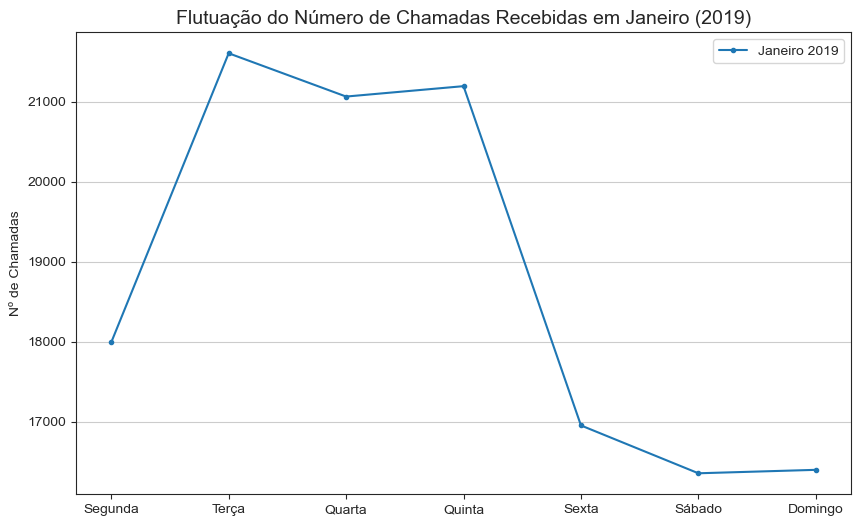

In [136]:
plt.figure(figsize=(10,6))

jan2019 = numeroChaPDS(1, 2019)

plt.plot(jan2019['Dia Semana'], jan2019['N Chamadas total'], '.-')
         
plt.title('Flutuação do Número de Chamadas Recebidas em Janeiro (2019)', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Janeiro 2019'])
plt.grid(axis='y')

plt.savefig('Img/Flutuação do Número de Chamadas Recebidas em Janeiro (2019)')

plt.show()

### Numero total de chamadas no mes de Fevereiro de 6 anos

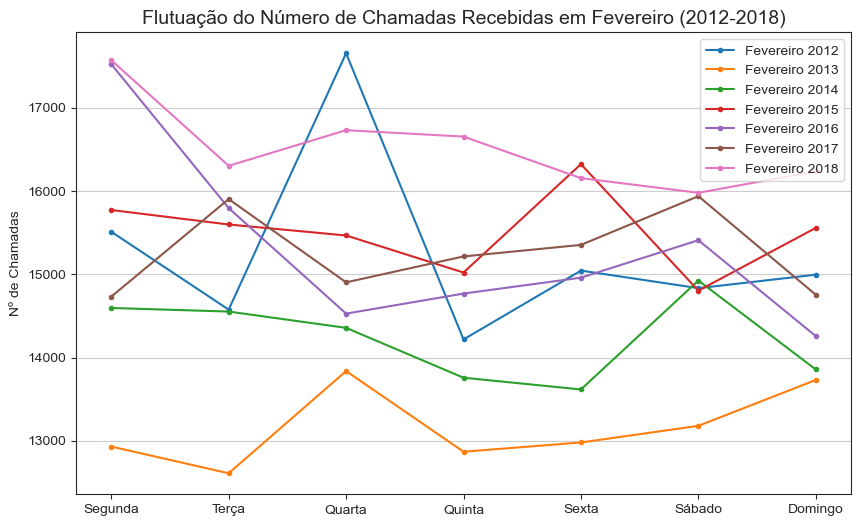

In [137]:
plt.figure(figsize=(10,6))

fev2012 = numeroChaPDS(2, 2012)
fev2013 = numeroChaPDS(2, 2013)
fev2014 = numeroChaPDS(2, 2014)
fev2015 = numeroChaPDS(2, 2015)
fev2016 = numeroChaPDS(2, 2016)
fev2017 = numeroChaPDS(2, 2017)
fev2018 = numeroChaPDS(2, 2018)

plt.plot(fev2012['Dia Semana'], fev2012['N Chamadas total'], '.-')
plt.plot(fev2013['Dia Semana'], fev2013['N Chamadas total'], '.-')
plt.plot(fev2014['Dia Semana'], fev2014['N Chamadas total'], '.-')
plt.plot(fev2015['Dia Semana'], fev2015['N Chamadas total'], '.-')
plt.plot(fev2016['Dia Semana'], fev2016['N Chamadas total'], '.-')
plt.plot(fev2017['Dia Semana'], fev2017['N Chamadas total'], '.-')
plt.plot(fev2018['Dia Semana'], fev2018['N Chamadas total'], '.-')
         
plt.title('Flutuação do Número de Chamadas Recebidas em Fevereiro (2012-2018)', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Fevereiro 2012', 'Fevereiro 2013', 'Fevereiro 2014', 'Fevereiro 2015', 
            'Fevereiro 2016', 'Fevereiro 2017', 'Fevereiro 2018'])
plt.grid(axis='y')

plt.savefig('Img/Flutuação do Número de Chamadas Recebidas em Fevereiro (2012-2018)')

plt.show()

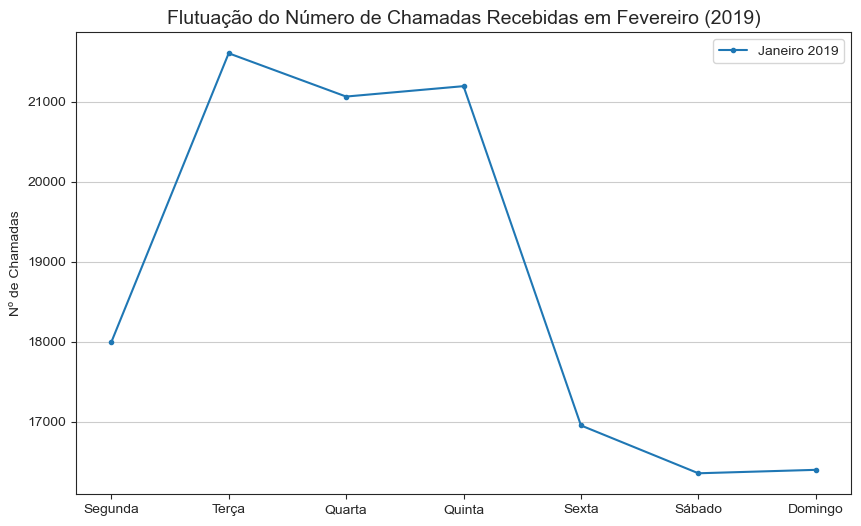

In [138]:
plt.figure(figsize=(10,6))

fev2019 = numeroChaPDS(2, 2019)

plt.plot(fev2019['Dia Semana'], jan2019['N Chamadas total'], '.-')
         
plt.title('Flutuação do Número de Chamadas Recebidas em Fevereiro (2019)', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Janeiro 2019'])
plt.grid(axis='y')

plt.savefig('Img/Flutuação do Número de Chamadas Recebidas em Fevereiro (2019)')

plt.show()

### Numero total de chamadas por dia de semana de 2022 (3 em 3 meses)

Primavera

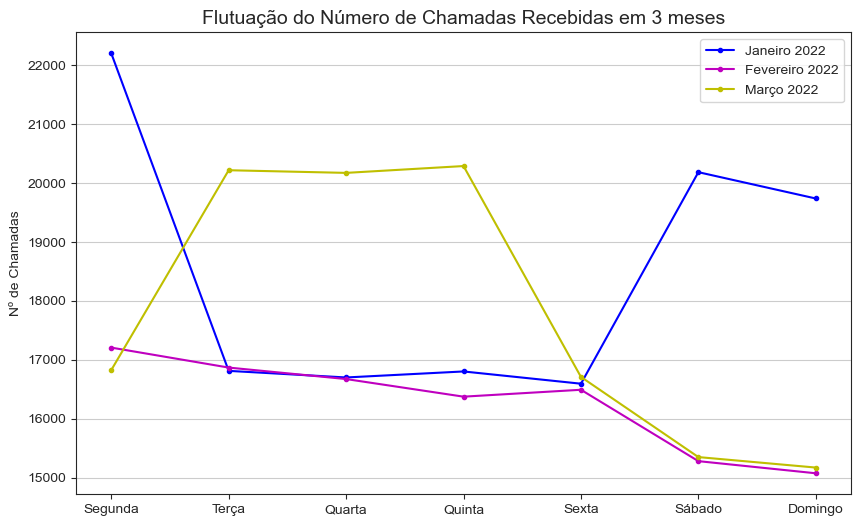

In [139]:
plt.figure(figsize=(10,6))

jan2022 = numeroChaPDS(1, 2022)
fev2022 = numeroChaPDS(2, 2022)
mar2022 = numeroChaPDS(3, 2022)

plt.plot(jan2022['Dia Semana'], jan2022['N Chamadas total'], 'b.-')
plt.plot(fev2022['Dia Semana'], fev2022['N Chamadas total'], 'm.-')
plt.plot(mar2022['Dia Semana'], mar2022['N Chamadas total'], 'y.-')

plt.title('Flutuação do Número de Chamadas Recebidas em 3 meses', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Janeiro 2022', 'Fevereiro 2022', 'Março 2022'])
plt.grid(axis='y')

plt.savefig('Img/Flutuação do Número de Chamadas Recebidas em 3 meses')
plt.show()

Verão

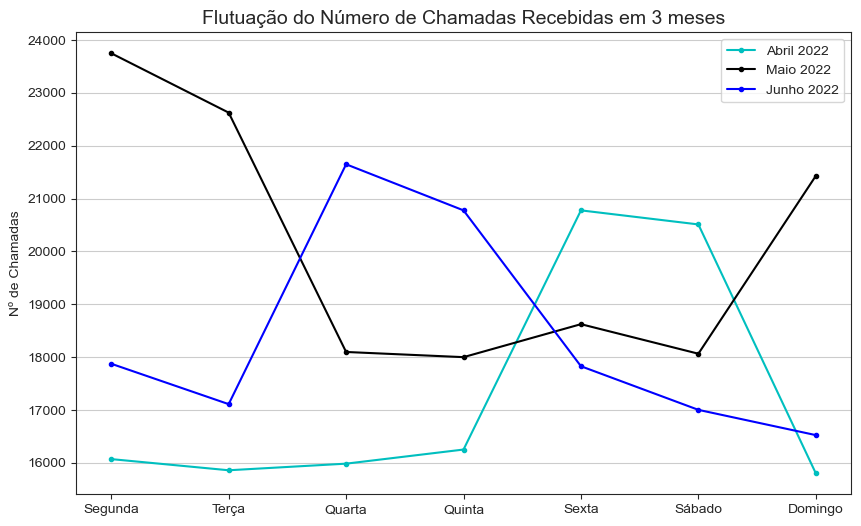

In [140]:
plt.figure(figsize=(10,6))

abr2022 = numeroChaPDS(4, 2022)
mai2022 = numeroChaPDS(5, 2022)
jun2022 = numeroChaPDS(6, 2022)

plt.plot(abr2022['Dia Semana'], abr2022['N Chamadas total'], 'c.-')
plt.plot(mai2022['Dia Semana'], mai2022['N Chamadas total'], 'k.-')
plt.plot(jun2022['Dia Semana'], jun2022['N Chamadas total'], 'b.-')

plt.title('Flutuação do Número de Chamadas Recebidas em 3 meses', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Abril 2022', 'Maio 2022', 'Junho 2022'])
plt.grid(axis='y')

plt.show()

Outono

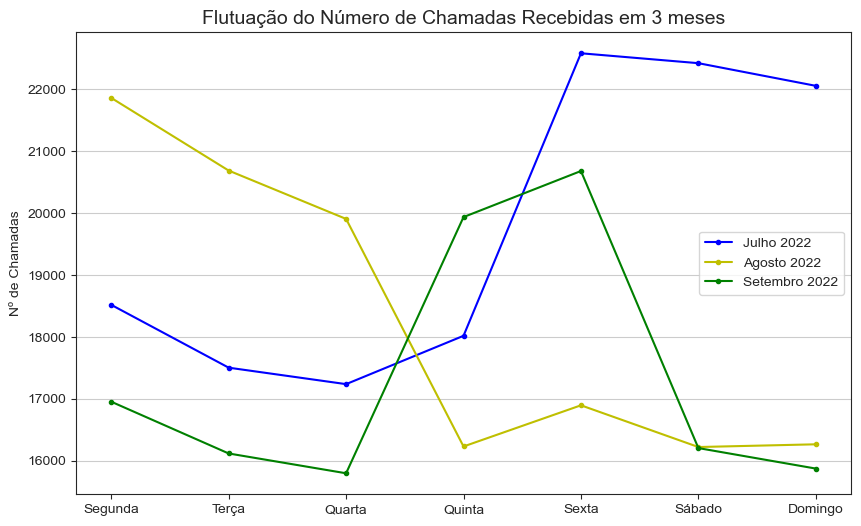

In [141]:
plt.figure(figsize=(10,6))

jul2022 = numeroChaPDS(7, 2022)
ago2022 = numeroChaPDS(8, 2022)
set2022 = numeroChaPDS(9, 2022)

plt.plot(jul2022['Dia Semana'], jul2022['N Chamadas total'], 'b.-')
plt.plot(ago2022['Dia Semana'], ago2022['N Chamadas total'], 'y.-')
plt.plot(set2022['Dia Semana'], set2022['N Chamadas total'], 'g.-')

plt.title('Flutuação do Número de Chamadas Recebidas em 3 meses', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Julho 2022', 'Agosto 2022', 'Setembro 2022'])
plt.grid(axis='y')

plt.show()

Inverno

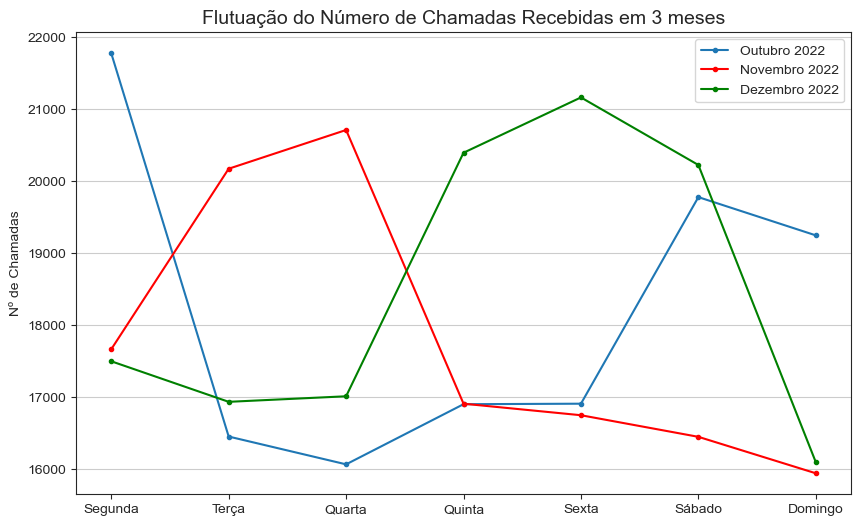

In [142]:
plt.figure(figsize=(10,6))

out2022 = numeroChaPDS(10, 2022)
nov2022 = numeroChaPDS(11, 2022)
dez2022 = numeroChaPDS(12, 2022)

plt.plot(out2022['Dia Semana'], out2022['N Chamadas total'], '.-')
plt.plot(nov2022['Dia Semana'], nov2022['N Chamadas total'], 'r.-')
plt.plot(dez2022['Dia Semana'], dez2022['N Chamadas total'], 'g.-')

plt.title('Flutuação do Número de Chamadas Recebidas em 3 meses', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Outubro 2022', 'Novembro 2022', 'Dezembro 2022'])
plt.grid(axis='y')

plt.show()